Exercises

In [25]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.9.1+cu126'

In [26]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


1. 
    Create a straight line dataset using the linear regression formula (weight * X + bias).

    Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
    Split the data into 80% training, 20% testing.
    Plot the training and testing data so it becomes visual

In [27]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight*X + bias

In [28]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [29]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

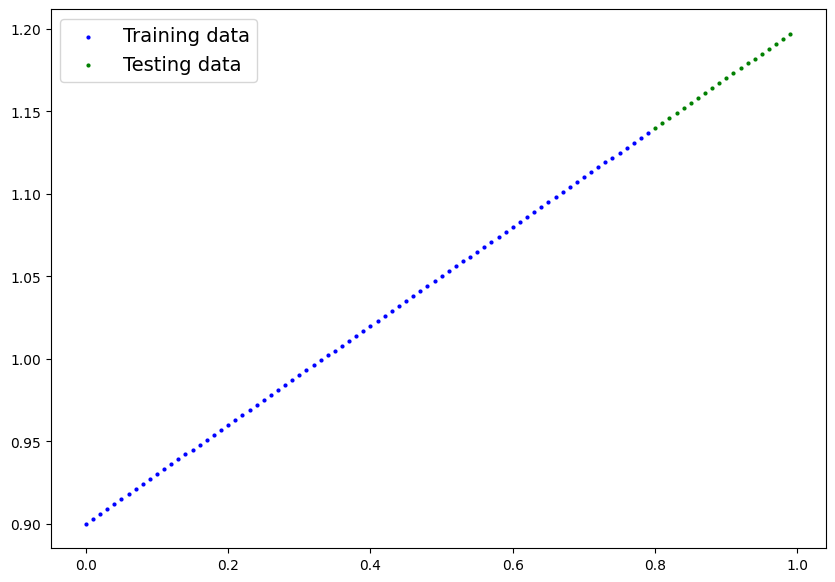

In [30]:
plot_predictions(X_train, y_train, X_test, y_test)

2. 
    Build a PyTorch model by subclassing nn.Module.

    Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
    Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
    Once you've constructed the model, make an instance of it and check its state_dict().
    Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.


In [31]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

model_1 = LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

3. 
    Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

    Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
    Write a training loop to perform the appropriate training steps for 300 epochs.
    The training loop should test the model on the test dataset every 20 epochs.


In [32]:
next(model_1.parameters()).device

device(type='cpu')

In [33]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [34]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [35]:
#torch.manual_seed(42)

epochs = 300

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.1275613158941269 | Test loss: 0.33650314807891846
Epoch: 20 | Train loss: 0.08187223970890045 | Test loss: 0.21840262413024902
Epoch: 40 | Train loss: 0.07207288593053818 | Test loss: 0.17458660900592804
Epoch: 60 | Train loss: 0.06507988274097443 | Test loss: 0.15310420095920563
Epoch: 80 | Train loss: 0.05822876840829849 | Test loss: 0.1367770880460739
Epoch: 100 | Train loss: 0.05137667804956436 | Test loss: 0.12079393863677979
Epoch: 120 | Train loss: 0.04452557489275932 | Test loss: 0.10446684807538986
Epoch: 140 | Train loss: 0.0376744270324707 | Test loss: 0.08813951909542084
Epoch: 160 | Train loss: 0.03082224726676941 | Test loss: 0.0721558928489685
Epoch: 180 | Train loss: 0.02397105097770691 | Test loss: 0.055828340351581573
Epoch: 200 | Train loss: 0.017119847238063812 | Test loss: 0.03950077295303345
Epoch: 220 | Train loss: 0.010267681442201138 | Test loss: 0.02351718582212925
Epoch: 240 | Train loss: 0.003416901919990778 | Test loss: 0.0071918368

In [36]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.3028]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8910], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


4. 
    Make predictions with the trained model on the test data.

    Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).


In [37]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[1.1333],
        [1.1363],
        [1.1393],
        [1.1423],
        [1.1454],
        [1.1484],
        [1.1514],
        [1.1545],
        [1.1575],
        [1.1605],
        [1.1635],
        [1.1666],
        [1.1696],
        [1.1726],
        [1.1757],
        [1.1787],
        [1.1817],
        [1.1847],
        [1.1878],
        [1.1908]], device='cuda:0')

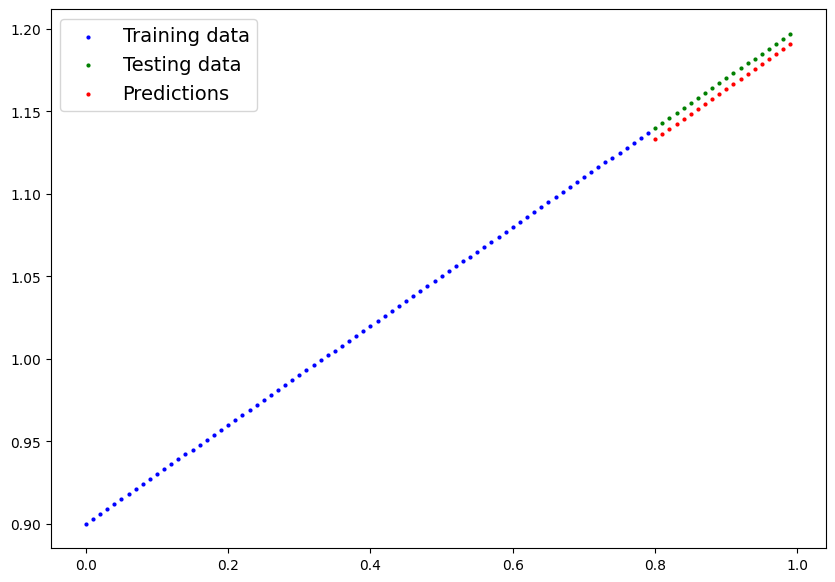

In [38]:
plot_predictions(predictions=y_preds.cpu())

5. 
    Save your trained model's state_dict() to file.

    Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
    Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.


In [39]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_exercises.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models\01_pytorch_workflow_model_exercises.pth


In [41]:
loaded_model_1 = LinearRegressionModel()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [42]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')